# Machine Learning Versão 2

- Remodelando variável ano_veiculo - idade_veículo -> ano - ano_veículo = idade_veículo;
- Separando desde o ínicio treino e teste ( 3dfs = X_test, X_train, y_train, y_test)


### Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transformação de variáveis categóricas para númericas;

import category_encoders as ce 

#Divisão entre treino e teste;
from sklearn.model_selection import train_test_split

# Utilizadas para escolha do modelo classificador;
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

# Análise de peformance do modelo classificador multiclass

import yellowbrick
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
from yellowbrick.model_selection import RFECV # Yellowbrick RFECV *
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import (plot_confusion_matrix, confusion_matrix, 
                             accuracy_score, recall_score,precision_score, 
                             plot_roc_curve,f1_score)

# Balanceamento do Dataset

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Deploy do modelo

import streamlit as st


## Variável ano_veiculo - idade_veículo -> ano - ano_veículo = idade_veículo;

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df = pd.read_csv('df_acidentes_v2.csv')

In [ ]:
df['idade_veiculo'] = df['ano'] - df['ano_fabricacao_veiculo'] 

In [ ]:
df['idade_veiculo'].max()

120.0

In [ ]:
df['idade_veiculo'].min()

0.0

## Treino e teste ( 3dfs = X_test, X_train, y_train, y_test)

Separando os dados em 3 dataframes e exportando os mesmo para que não haja nenhum problema posteriormente

Preparando os dados:

In [ ]:
df = df[['mes_sin', 'mes_cos', 'dias_semana_sin', 'dias_semana_cos', 'horario_sin',
       'horario_cos', 'causa_acidente', 'tipo_acidente', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'tipo_veiculo', 'tipo_envolvido', 'idade',
       'sexo', 'idade_veiculo','latitude','longitude', 'classificacao_acidente']].copy()

In [ ]:
# Definição de X e y:

X = df[['mes_sin', 'mes_cos', 'dias_semana_sin', 'dias_semana_cos', 'horario_sin',
       'horario_cos', 'causa_acidente', 'tipo_acidente', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'tipo_veiculo', 'tipo_envolvido', 'idade',
       'sexo', 'idade_veiculo']

y = df['classificacao_acidente']

In [ ]:
#logo acima foi definido o y = ['classificacao_acidente']
#Agora o nosso X = Categóricas encoded + númericas
# Escolha de utilizar 70% como treino e 30  % como teste

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

### Verificando Distribuições dos dados de Treino e Teste

In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
#Para que os dados sejam uma série.

y_train = y_train['classificacao_acidente']
y_test = y_test['classificacao_acidente']

KeyError: 'classificacao_acidente'

Podemos observar uma proporção boa entre treino e teste desta forma podemos prosseguir com os dataframes gerados;

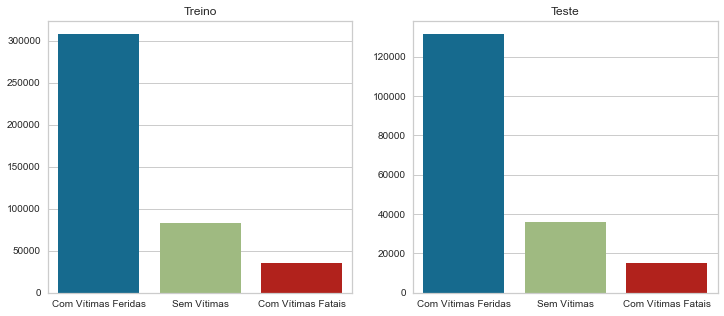

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
                
sns.barplot(ax=ax1,x=y_train['classificacao_acidente'].value_counts().index ,y = y_train.value_counts()).set_title('Treino');

                
sns.barplot(ax=ax2,x=y_test['classificacao_acidente'].value_counts().index ,y = y_test.value_counts()).set_title('Teste');


In [ ]:
y_train.value_counts(normalize=True)

classificacao_acidente
Com Vítimas Feridas       0.721339
Sem Vítimas               0.194494
Com Vítimas Fatais        0.084166
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

classificacao_acidente
Com Vítimas Feridas       0.718880
Sem Vítimas               0.197317
Com Vítimas Fatais        0.083802
dtype: float64

## Binary Encoding Train Variables

## X_train Encoding

Pega o X_train dataframe e transforma as variáveis declaradas através do binary encoding;
Retorna o X_train transformado;

In [ ]:
encoder = ce.BinaryEncoder(cols=['causa_acidente',
  'tipo_acidente',
  'condicao_metereologica',
  'tipo_pista',
  'tracado_via',
  'uso_solo',
  'tipo_veiculo',
  'tipo_envolvido','sexo']) # As colunas são as mesmas de X_cat

X_train = encoder.fit_transform(X_train) # df_binary contêm X_cat transformado pelo binary encoder

X_train.sample(5)

C:\Users\rodri\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,mes_sin,mes_cos,dias_semana_sin,dias_semana_cos,horario_sin,horario_cos,causa_acidente_0,causa_acidente_1,causa_acidente_2,causa_acidente_3,causa_acidente_4,causa_acidente_5,tipo_acidente_0,tipo_acidente_1,tipo_acidente_2,tipo_acidente_3,tipo_acidente_4,condicao_metereologica_0,condicao_metereologica_1,condicao_metereologica_2,condicao_metereologica_3,condicao_metereologica_4,tipo_pista_0,tipo_pista_1,tipo_pista_2,tracado_via_0,tracado_via_1,tracado_via_2,tracado_via_3,tracado_via_4,uso_solo_0,uso_solo_1,tipo_veiculo_0,tipo_veiculo_1,tipo_veiculo_2,tipo_veiculo_3,tipo_veiculo_4,tipo_veiculo_5,tipo_envolvido_0,tipo_envolvido_1,tipo_envolvido_2,idade,sexo_0,sexo_1,idade_veiculo,latitude,longitude
284584,-2.449294e-16,1.000000e+00,-7.818315e-01,0.623490,-0.819152,-0.573576,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,50.0,1,0,7.0,-7.938533,-39.133820
75580,1.000000e+00,6.123234e-17,-2.449294e-16,1.000000,0.876727,-0.480989,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,27.0,0,1,10.0,-15.465593,-49.499416
195106,-8.660254e-01,5.000000e-01,4.338837e-01,-0.900969,0.325568,0.945519,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,36.0,0,1,12.0,-21.660840,-45.304250
364745,-1.000000e+00,-1.836970e-16,-9.749279e-01,-0.222521,-0.087156,-0.996195,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,45.0,0,1,8.0,-9.207396,-54.878330
338174,-5.000000e-01,8.660254e-01,7.818315e-01,0.623490,-0.382683,0.923880,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,30.0,0,1,8.0,-25.842200,-49.057300


## X_test Encoding

In [ ]:
encoder = ce.BinaryEncoder(cols=['causa_acidente',
  'tipo_acidente',
  'condicao_metereologica',
  'tipo_pista',
  'tracado_via',
  'uso_solo',
  'tipo_veiculo',
  'tipo_envolvido','sexo']) # As colunas são as mesmas de X_cat

X_test = encoder.fit_transform(X_test) # df_binary contêm X_cat transformado pelo binary encoder

X_test.sample(5)

C:\Users\rodri\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,mes_sin,mes_cos,dias_semana_sin,dias_semana_cos,horario_sin,horario_cos,causa_acidente_0,causa_acidente_1,causa_acidente_2,causa_acidente_3,causa_acidente_4,causa_acidente_5,tipo_acidente_0,tipo_acidente_1,tipo_acidente_2,tipo_acidente_3,tipo_acidente_4,condicao_metereologica_0,condicao_metereologica_1,condicao_metereologica_2,condicao_metereologica_3,condicao_metereologica_4,tipo_pista_0,tipo_pista_1,tipo_pista_2,tracado_via_0,tracado_via_1,tracado_via_2,tracado_via_3,tracado_via_4,uso_solo_0,uso_solo_1,tipo_veiculo_0,tipo_veiculo_1,tipo_veiculo_2,tipo_veiculo_3,tipo_veiculo_4,tipo_veiculo_5,tipo_envolvido_0,tipo_envolvido_1,tipo_envolvido_2,idade,sexo_0,sexo_1,idade_veiculo,latitude,longitude
95126,1.000000e+00,6.123234e-17,-7.818315e-01,0.623490,-0.831470,-0.555570,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,39.00000,1,0,1.0,-26.963932,-48.683280
124571,8.660254e-01,5.000000e-01,-9.749279e-01,-0.222521,-0.342020,0.939693,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,51.00000,0,1,13.0,-27.502510,-48.652309
156592,-2.449294e-16,1.000000e+00,9.749279e-01,-0.222521,-0.887011,0.461749,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,33.00000,1,0,7.0,-22.381704,-42.954777
88694,1.224647e-16,-1.000000e+00,-7.818315e-01,0.623490,-0.946930,-0.321439,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,28.00000,0,1,11.0,-20.288112,-49.199760
108509,1.224647e-16,-1.000000e+00,-2.449294e-16,1.000000,-0.991445,0.130526,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,38.07216,0,1,7.0,-21.640920,-42.838900


### Benchmarking Modelos

In [ ]:
classifiers=[]

In [ ]:
model1 = xgboost.XGBClassifier(n_jobs=-1,random_state=42)
classifiers.append(model1)
model2 = DecisionTreeClassifier(random_state=42)
classifiers.append(model2)
model3 = RandomForestClassifier(n_jobs=-1,random_state=42)
classifiers.append(model3)
model4 = GaussianNB()
classifiers.append(model4)
model5 = KNeighborsClassifier(n_jobs=-1)
classifiers.append(model5)

C:\Users\rodri\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[00:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 67.7935437323043


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


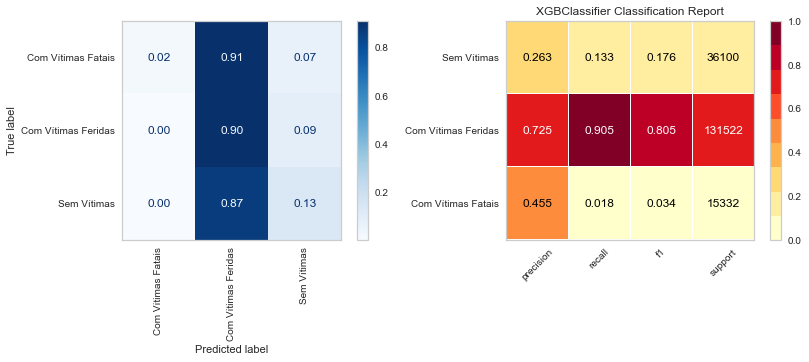

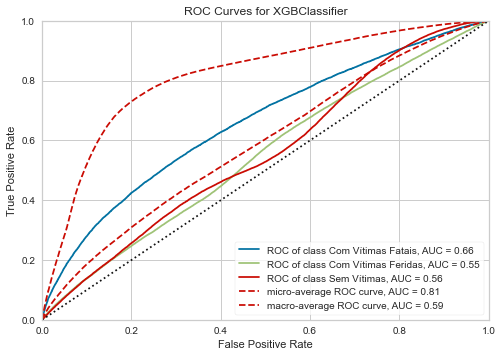

Accuracy of DecisionTreeClassifier(random_state=42) is 56.598926506116285


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


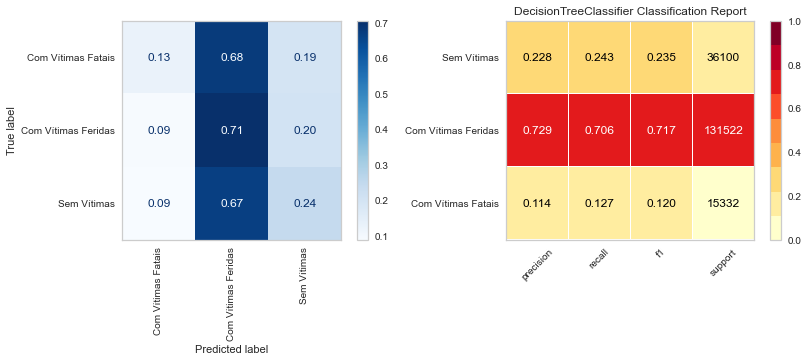

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


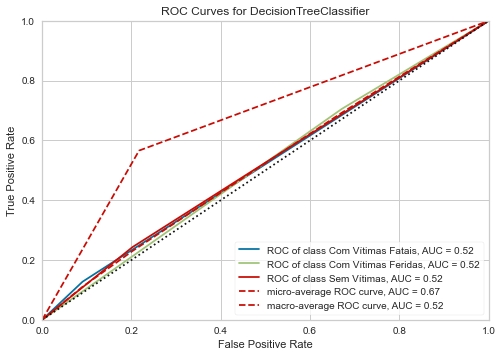

<ipython-input-20-e5a2079998fe>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy of RandomForestClassifier(n_jobs=-1, random_state=42) is 70.39365086305848


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


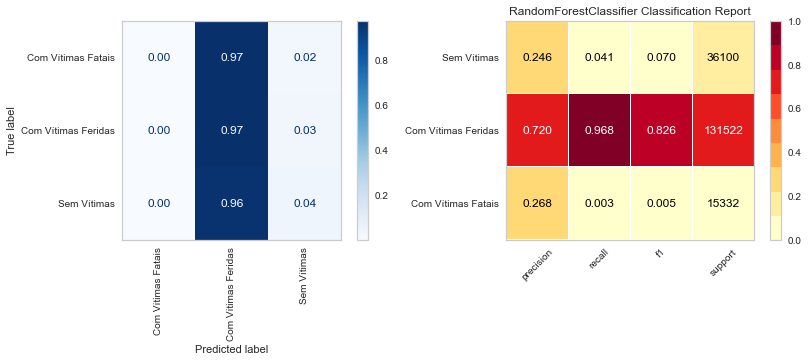

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


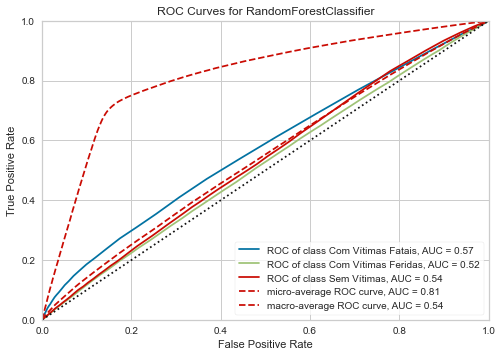

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of GaussianNB() is 62.92674661390295


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


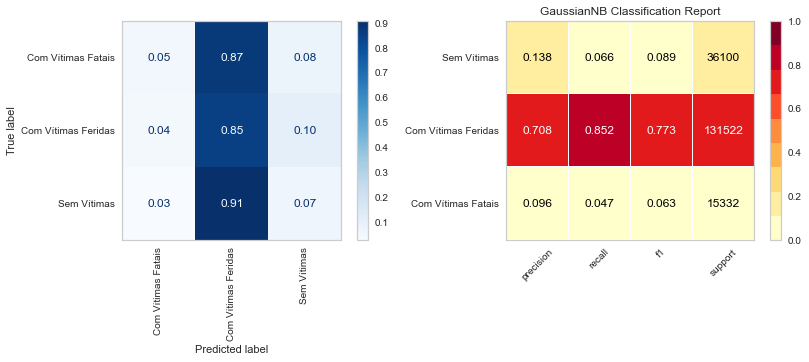

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


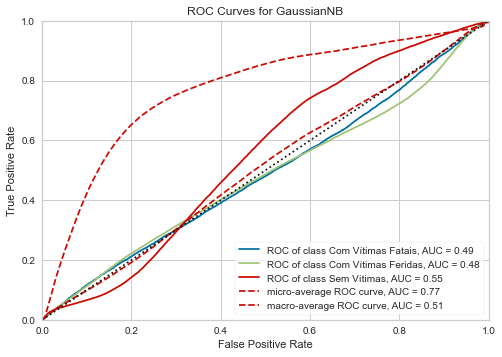

<ipython-input-20-e5a2079998fe>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy of KNeighborsClassifier(n_jobs=-1) is 68.3237316483925


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


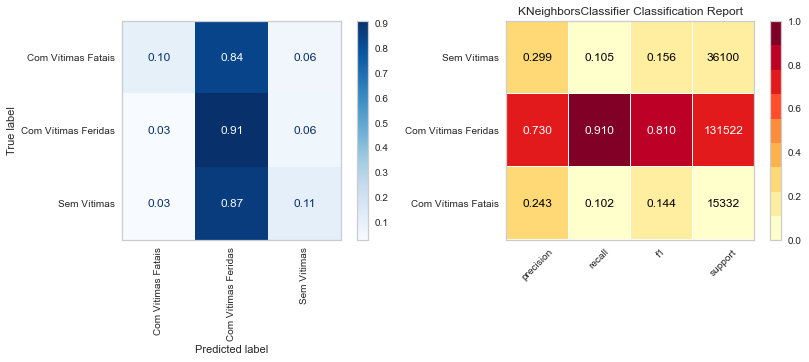

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


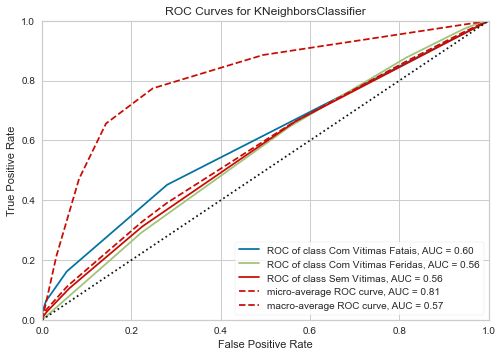

In [ ]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    print("Accuracy of %s is %s"%(clf, acc))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.grid(False)
    ax2.grid(False)
    
    plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90);
    plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90); 
   

    plot_confusion_matrix(clf,X_test,y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')
    
    visualizer = classification_report(clf, X_train, y_train, X_test, y_test, support=True,ax=ax2)
    visualizer_2 = ROCAUC(clf)

    visualizer_2.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer_2.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer_2.show()                       # Finalize and show the figure
    
    #confusion_matrix(y_test,clf.predict(X_test))
    #print("Confusion Matrix of %s is %s"%(clf, cm))

# Conclusão dos Modelos Testados:

# Seleção do modelo a ser otimizado

Análise da performance do f1 através de diferentes números de features utilizadas, a fim de definir o número ótimo de features para o RandomForestClassifier()

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,random_state=42)
rfecv = RFECV(estimator=rfc, step=1, scoring='f1_weighted') # f1_weighted to optimize
model = rfecv.fit(X_train, y_train)

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 3


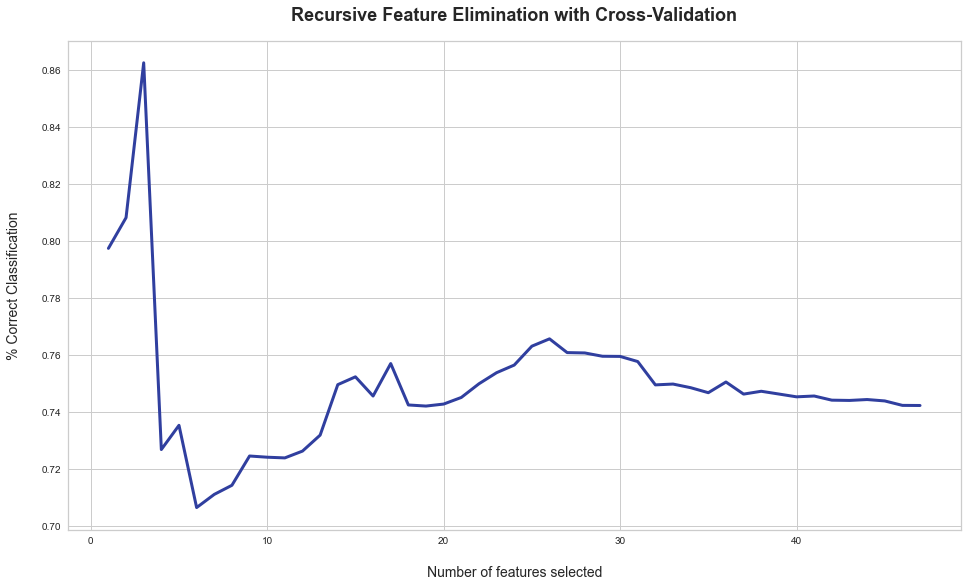

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

## RFE - Looking for main 3 features

RFECV mostrou pra nós o número ótimo de features para utilização no modelo otimizado para f1-weighted, agora vamos identificar quais são os 3itens mais importantes:

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# Instanciando o RFE
# Você passa o estimador dentro do RFE
# Também passa a quantidade de features a preservar 28 vindos do RFECV

rfe = RFE(estimator=RandomForestClassifier(n_jobs=-1,random_state=42),
n_features_to_select=3, verbose=1) # Verbose ?
#Fitando nos dados
rfe.fit(X_train,y_train)

Fitting estimator with 47 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 46 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 45 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 44 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 43 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 42 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 41 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 40 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 39 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 38 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 37 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 36 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 35 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 34 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 33 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 32 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 31 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 30 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 29 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 28 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 27 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 26 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 25 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 24 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 23 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 22 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 21 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 20 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 19 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 18 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 17 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 16 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 15 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 14 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 13 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 12 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 11 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 10 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 9 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 8 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 7 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 6 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 5 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)


Fitting estimator with 4 features.


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:231: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y)


RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
    n_features_to_select=3, verbose=1)

In [ ]:
# Criando dataframe com as colunas 45 vindas do dataframe completo
# Status esta descrito se a coluna foi utilizada (True) ou False

df_feat = pd.DataFrame(
{"Features" : X_train.columns.tolist(),
"Status" : rfe.support_.tolist()})     

Lista contendo as melhores 3 features para o modelo, encontradas via RFE

In [ ]:
# Criando uma lista apenas com as 3 features escolhidas

features = df_feat.loc[df_feat['Status']==True,'Features'].to_list()
features 

['horario_sin', 'latitude', 'longitude']

In [ ]:
features = ['horario_sin', 'latitude', 'longitude']

### Random Forest Classifier - Balanceamento and Tunning

Aqui serão utilizadas as features que foram definidas através do RFECV;

Objetivo principal aumentar e equilibrar recall entre classes balanceadas;

Priorizar acertos em mortos e também feridos, sem vitimas pode ter o menor recall and precision;

!!! Importante, para os balanceamentos foram apenas realizados para os dados de teste, sendo que o de treino manteve-se intacto para efeito de validação!

Importante, a partir daqui apenas utilizaremos em X_train as colunas descritas em features = [] definidas pelo RFECV e RFE; 

In [ ]:
clf = RandomForestClassifier(n_jobs = -1, random_state=42) # Definição do modelo;

### Modelo puro

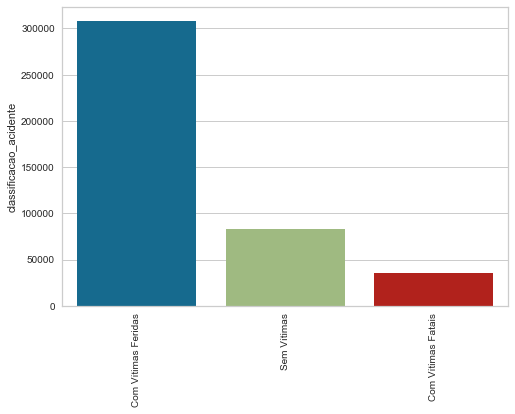

In [ ]:
sns.barplot(x=y_train.value_counts().index ,y = y_train.value_counts())
plt.xticks(rotation=90);

Observa-se um desbalanceamento entres a classe vitimas feriadas e as demais, podemos observar a proporção:

In [ ]:
y.value_counts()/440746

Com Vítimas Feridas    0.997073
Sem Vítimas            0.270287
Com Vítimas Fatais     0.116307
Name: classificacao_acidente, dtype: float64

Accuracy of RandomForestClassifier(class_weight={'Com Vítimas Fatais': 100,
                                     'Com Vítimas Feridas': 20,
                                     'Sem Vítimas': 1},
                       n_jobs=-1) is 89.56349683527007


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


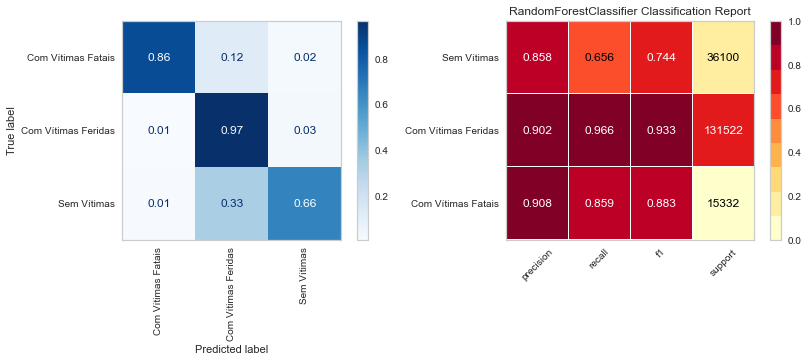

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


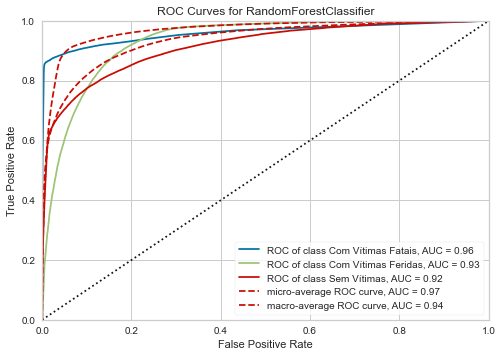

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
clf.fit(X_train[features], y_train)
y_pred= clf.predict(X_test[features])

acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.grid(False)
ax2.grid(False)

plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90);
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90); 


plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')
visualizer = classification_report(clf, X_train[features], y_train, X_test[features], y_test, support=True,ax=ax2)

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                                 # Finalize and show the figure
    

In [ ]:
y_pred

array(['Com Vítimas Feridas'], dtype=object)

In [ ]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

### Undersampling

### Discutir ! Gostei deste modelo, pois o recall parece muito melhor balanceado ! apenas gostaria de mudar o threshold a fim de priorizar acertos em vitimas e mortos ao invés de sem vitimas

In [ ]:
print('Original dataset shape %s' %Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_rus,y_rus = rus.fit_resample(X_train,y_train) 

print('Resampled dataset shape %s' %Counter(y_rus))

Original dataset shape Counter({'Com Vítimas Feridas': 307934, 'Sem Vítimas': 83028, 'Com Vítimas Fatais': 35930})
Resampled dataset shape Counter({'Com Vítimas Fatais': 35930, 'Com Vítimas Feridas': 35930, 'Sem Vítimas': 35930})


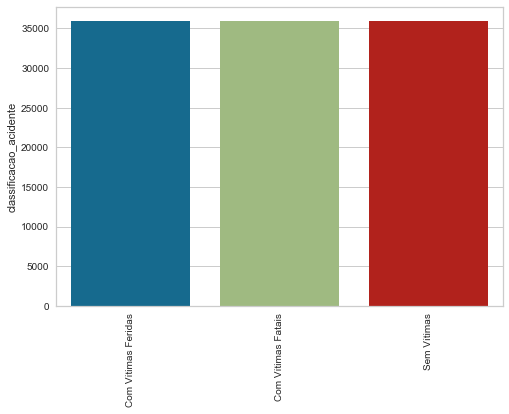

In [ ]:
sns.barplot(x=y_rus.value_counts().index ,y = y_rus.value_counts())
plt.xticks(rotation=90);

Accuracy of RandomForestClassifier(n_jobs=-1) is 60.627808082906085


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


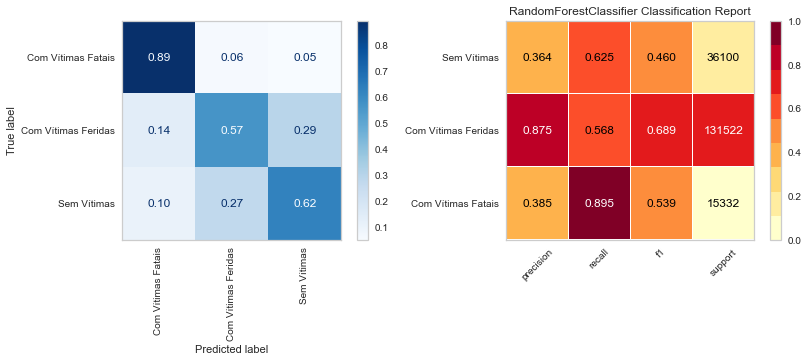

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


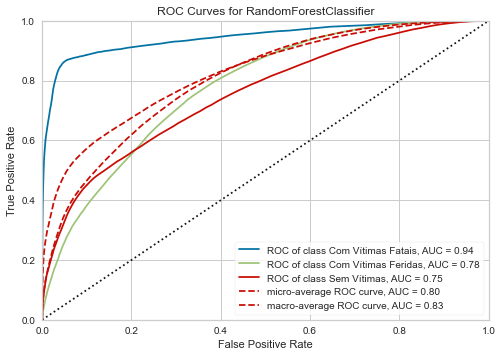

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
clf=RandomForestClassifier(n_jobs=-1 )
clf.fit(X_rus[features],y_rus)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.grid(False)
ax2.grid(False)


plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')
visualizer = classification_report(clf, X_rus[features], y_rus, X_test[features], y_test, support=True,ax=ax2);


visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                                 # Finalize and show the figure

## Oversampling

In [ ]:
print('Original dataset shape %s' %Counter(y_train))

rov = RandomOverSampler(random_state=42)
X_rov,y_rov = rov.fit_resample(X_train,y_train) # Só vou modificar os dados de treino

print('Resampled dataset shape %s' %Counter(y_rov))

Original dataset shape Counter({'Com Vítimas Feridas': 307934, 'Sem Vítimas': 83028, 'Com Vítimas Fatais': 35930})
Resampled dataset shape Counter({'Sem Vítimas': 307934, 'Com Vítimas Feridas': 307934, 'Com Vítimas Fatais': 307934})


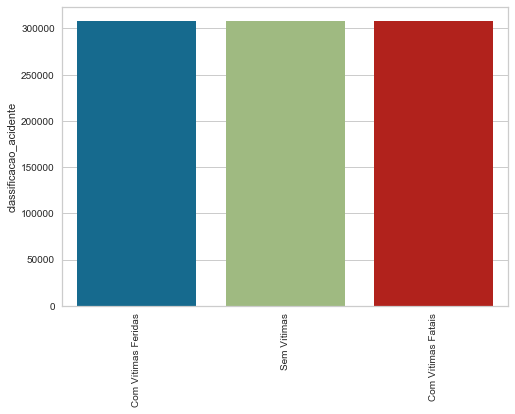

In [ ]:
sns.barplot(x=y_rov.value_counts().index ,y = y_rov.value_counts())
plt.xticks(rotation=90);

Accuracy of RandomForestClassifier(n_jobs=-1) is 88.86550717666736


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


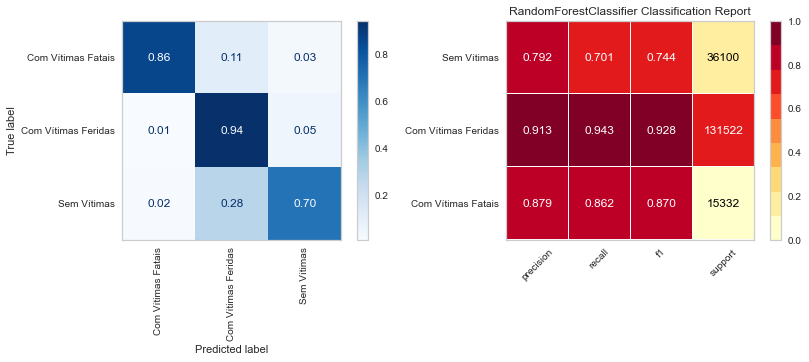

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


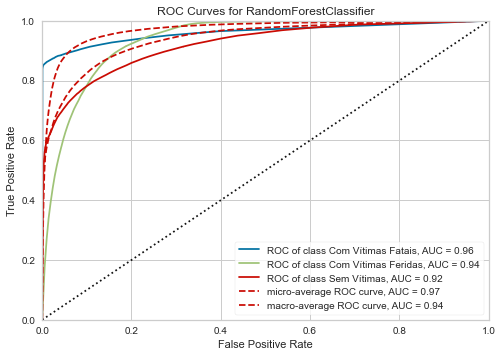

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
clf.fit(X_rov[features],y_rov)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.grid(False)
ax2.grid(False)


plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90)
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90)

plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')
visualizer = classification_report(clf,X_rov[features],y_rov , X_test[features], y_test, support=True,ax=ax2)

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                       # Finalize and show the figure
    
         
#confusion_matrix(y_test,clf.predict(X_test))
#print("Confusion Matrix of %s is %s"%(clf, cm))

### SMOT:

In [ ]:
smote = SMOTE(random_state=42)
X_sm,y_sm = smote.fit_sample(X_train,y_train)

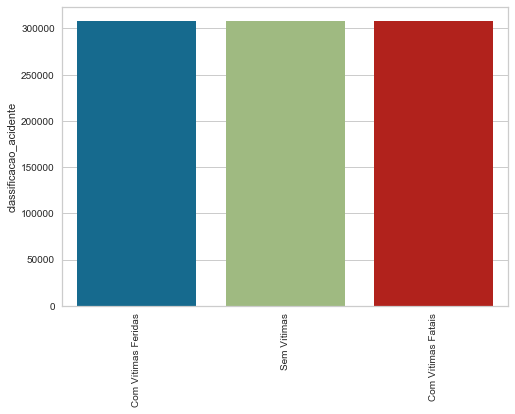

In [ ]:
sns.barplot(x=y_sm.value_counts().index ,y = y_sm.value_counts())
plt.xticks(rotation=90);

Accuracy of RandomForestClassifier(n_jobs=-1) is 87.33342807481662


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


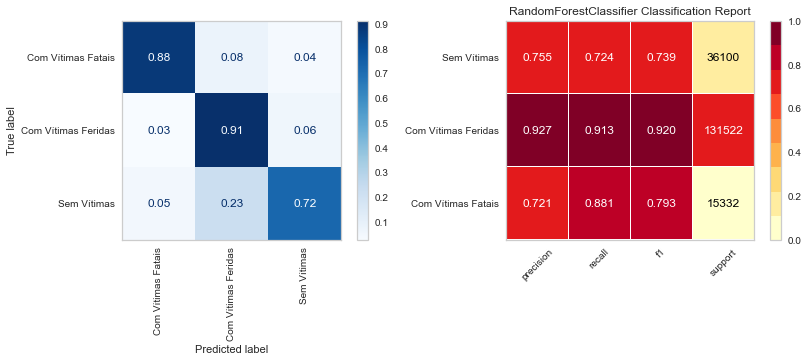

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


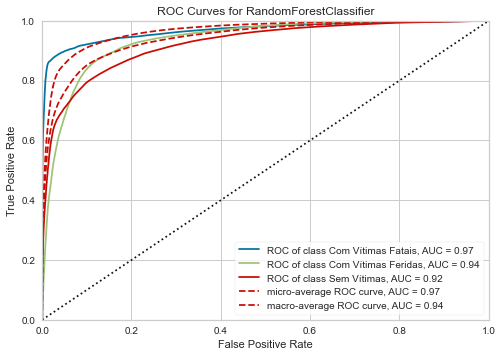

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
clf.fit(X_sm[features],y_sm)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.grid(False)
ax2.grid(False)


plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90)
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90)

plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')
visualizer = classification_report(clf,X_sm[features],y_sm , X_test[features], y_test, support=True,ax=ax2)

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                       # Finalize and show the figure
    
         
#confusion_matrix(y_test,clf.predict(X_test))
#print("Confusion Matrix of %s is %s"%(clf, cm))


### ADASYN

In [ ]:
adasyn = ADASYN(random_state=42)

X_ada, y_ada = adasyn.fit_resample(X_train,y_train)

Accuracy of RandomForestClassifier(n_jobs=-1) is 87.231763175443


C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


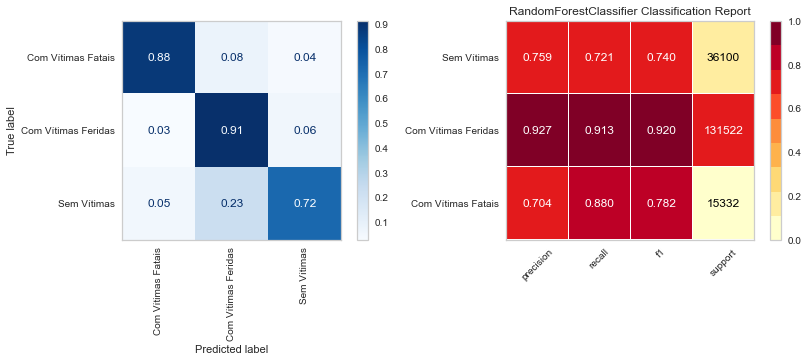

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


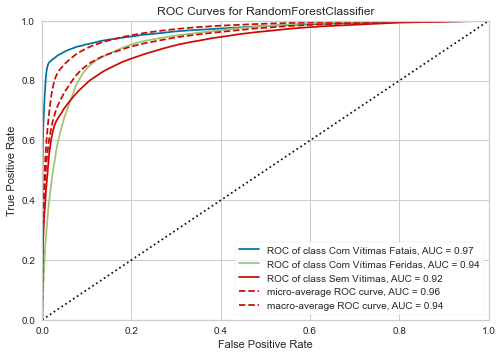

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
clf.fit(X_ada[features],y_ada)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.grid(False)
ax2.grid(False)


plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90)
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90)

plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')
visualizer = classification_report(clf,X_ada[features],y_ada , X_test[features], y_test, support=True,ax=ax2)

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                       # Finalize and show the figure
    
         
#confusion_matrix(y_test,clf.predict(X_test))
#print("Confusion Matrix of %s is %s"%(clf, cm))

### Hyperparameter Tunning based on  Undersample GRIDCV:

### Referência: 

In [ ]:
print('Original dataset shape %s' %Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_rus,y_rus = rus.fit_resample(X_train,y_train) 

print('Resampled dataset shape %s' %Counter(y_rus))

Original dataset shape Counter({'Com Vítimas Feridas': 307934, 'Sem Vítimas': 83028, 'Com Vítimas Fatais': 35930})
Resampled dataset shape Counter({'Com Vítimas Fatais': 35930, 'Com Vítimas Feridas': 35930, 'Sem Vítimas': 35930})


In [ ]:
sns.barplot(x=y_rus['classificacao_acidente'].value_counts().index ,y = y_rus['classificacao_acidente'].value_counts())
plt.xticks(rotation=90);

KeyError: 'classificacao_acidente'

In [ ]:
clf=RandomForestClassifier(n_jobs=-1,random_state=42)
clf.fit(X_rus[features],y_rus)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.grid(False)
ax2.grid(False)

plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90);
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90); 



plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')

visualizer = classification_report(clf, X_rus[features], y_rus, X_test[features], y_test, support=True,ax=ax2);

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                                 # Finalize and show the figure

## Tunning Random Forest:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [1000]

# Number of features to consider at every split
max_features = ['auto', 'log', 0.25, 0.5, 0.75, 1.0]

# Maximum number of levels in tree
max_depth = [1, 3, 5, 7, 9, 11, 13, 15]

# Method of selecting samples for training each tree
bootstrap = [True]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,cv=3, param_grid=random_grid,verbose=2,n_jobs=-1,scoring=f1)

In [ ]:
grid_rf.fit(X_rus[features],y_rus)

In [ ]:
grid_rf.cv_results_

In [ ]:
grid_rf.cv_results_['mean_test_score']

In [ ]:
grid_rf.cv_results_['param_max_depth'].data

In [ ]:
grid_rf.cv_results_['param_max_features'].data

In [ ]:
sns.barplot(x=grid_rf.cv_results_['param_max_features'].data,y=grid_rf.cv_results_['mean_test_score'])
plt.xlabel('Param_max_features')
plt.ylabel('Mean score')
plt.show()

In [ ]:
sns.lineplot(x=grid_rf.cv_results_['param_max_depth'].data,y=grid_rf.cv_results_['mean_test_score'])
plt.xlabel('Param_max_depth')
plt.ylabel('Mean score')
plt.show()

In [ ]:
grid_rf.best_params_

In [ ]:
clf=RandomForestClassifier(n_jobs=-1,n_estimators=1000,max_features='auto',max_depth= 15,bootstrap=True,random_state=42)
clf.fit(X_rus[features],y_rus)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.grid(False)
ax2.grid(False)

plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90);
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90); 



plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')

visualizer = classification_report(clf, X_rus[features], y_rus, X_test[features], y_test, support=True,ax=ax2);

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                                 # Finalize and show the figure

In [ ]:
cw=dict({'Sem Vítimas':1,'Com Vítimas Feridas':5,'Com Vítimas Fatais':10})

In [ ]:
cw=dict({'Sem Vítimas':1,'Com Vítimas Feridas':1,'Com Vítimas Fatais':3})

In [ ]:
cw=dict({'Sem Vítimas':1.05,'Com Vítimas Feridas':1.5,'Com Vítimas Fatais':3})

In [ ]:
cw=dict({'Sem Vítimas':1.7,'Com Vítimas Feridas':2,'Com Vítimas Fatais':4})

In [ ]:
clf=RandomForestClassifier(n_jobs=-1,n_estimators=1000,max_features='auto',max_depth= 15,bootstrap=True,random_state=42)
clf.fit(X_rus[features],y_rus)
y_pred= clf.predict(X_test[features])
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of %s is %s"%(clf, acc))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.grid(False)
ax2.grid(False)

plt.setp( ax1.xaxis.get_majorticklabels(),rotation=90);
plt.setp( ax2.xaxis.get_majorticklabels(),rotation=90); 



plot_confusion_matrix(clf,X_test[features],y_test,cmap='Blues',values_format = '.2f',ax=ax1,normalize='true',xticks_rotation='vertical')

visualizer = classification_report(clf, X_rus[features], y_rus, X_test[features], y_test, support=True,ax=ax2);

visualizer_2 = ROCAUC(clf)

visualizer_2.fit(X_train[features], y_train)        # Fit the training data to the visualizer
visualizer_2.score(X_test[features], y_test)        # Evaluate the model on the test data
visualizer_2.show()                                 # Finalize and show the figure

In [ ]:
y_train.to_numpy()

In [ ]:
np.unique(y_train)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y) 

# ['balanced', 'calculated balanced', 'normalized'] are hyperpaameters whic we can play with.

In [ ]:
class_weights

In [ ]:
clf.grid_scores_

In [ ]:
grid_rf.best_params_

In [ ]:
!streamlit hello

^C
